# Sales Forecast Analytics
In this project, we will analyze and forecast sales of pesticides 
for a domestic pesticide manufacturing company (ABC 
Manufacturing) and analyze variables that impact the sales of 
the product.

# Installing the required packages

In [1]:
import warnings
import csv
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
import os 
os.getcwd()

'C:\\Users\\Pawan\\Desktop\\python'

# Reading the Time Series Data



In [3]:
df = pd.read_excel("Sales_Forecast_Data.xlsx")

In [4]:
df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014


In [5]:
df.tail()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00,2016
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75,2016
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00,2016
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00,2016
230151,2016-2017,Jan,Uttar Pradesh,Bactericides,Basti,venible,0.00,2016


# Data Preprocessing

In [6]:
df['FG'].value_counts()

Bactericides    57538
Rodenticides    57538
Herbicides      57538
Insecticides    57538
Name: FG, dtype: int64

In [7]:
df.shape

(230152, 8)

In [8]:
df.isnull().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
date        0
dtype: int64

<AxesSubplot:>

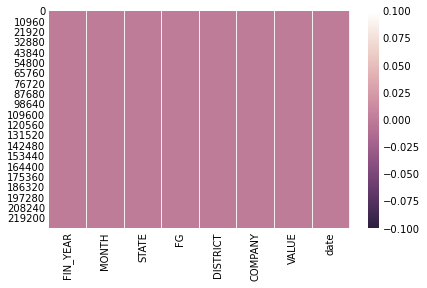

In [9]:
cmap=sns.cubehelix_palette(light=1,as_cmap=True,reverse=True)
sns.heatmap(df.isnull(),cmap=cmap)

# Adding Rainfall Data from 2014-2017 obtained from external source

In [10]:
rain=pd.read_excel("Rainfall_Data.xlsx")
rain.head()

,SUBDIVISION,YEAR,Month,RAINFALL
0,Uttar Pradesh,2014,Jan,48.3
1,Uttar Pradesh,2014,Feb,29.4
2,Uttar Pradesh,2014,Mar,22.6
3,Uttar Pradesh,2014,Apr,5.3
4,Uttar Pradesh,2014,May,11.0


In [11]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  300 non-null    object 
 1   YEAR         300 non-null    int64  
 2   Month        300 non-null    object 
 3   RAINFALL     300 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.5+ KB


In [12]:
rain['MONTH_YEAR']= rain['Month'].map(str)+ rain['YEAR'].map(str)

rain.head()

,SUBDIVISION,YEAR,Month,RAINFALL,MONTH_YEAR
0,Uttar Pradesh,2014,Jan,48.3,Jan2014
1,Uttar Pradesh,2014,Feb,29.4,Feb2014
2,Uttar Pradesh,2014,Mar,22.6,Mar2014
3,Uttar Pradesh,2014,Apr,5.3,Apr2014
4,Uttar Pradesh,2014,May,11.0,May2014


## Adding QTR column in dataframe

In [13]:
d={'Jan':'Q4','Feb':'Q4','Mar':'Q4','Apr':'Q1','May':'Q1','Jun':'Q1','Jul':'Q2','Aug':'Q2','Sep':'Q2','Oct':'Q3','Nov':'Q3','Dec':'Q3'}
df['QTR']=df.MONTH.map(d)
df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date,QTR
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014,Q3
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014,Q3
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014,Q3
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014,Q3
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014,Q3


## Creating the dataframe for ABC Manufacturing

In [14]:
df['COMPANY'].value_counts()

ABC Manufacturing    28640
trita                22744
cynoid               20800
disescent            17012
interosis            14288
idiombee             13904
exicious             12992
unimm                10184
scire                10152
zooloo               10032
unent                 9760
janu                  9432
hemify                7924
venible               7844
socimbee              6812
monous                4888
kadoo                 4272
flimbo                3476
intravu               3460
agizu                 2700
archile               1428
esose                 1056
munder                 820
dominive               580
suroid                 544
inent                  536
alboid                 512
yore                   468
biore                  464
hypomba                380
insulescent            328
falcize                240
centicee               240
oyofix                 220
ament                  212
canill                 200
transescent            116
l

In [15]:
df1= df[df['COMPANY']==('ABC Manufacturing')]

In [16]:
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date,QTR
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Q3
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Q3
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Q3
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Q3
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Q3


In [17]:
df1.shape


(28640, 9)

In [18]:
df1['MONTH_YEAR']=df['MONTH']+df['FIN_YEAR'].str[:4]
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date,QTR,MONTH_YEAR
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Q3,Dec2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Q3,Dec2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Q3,Dec2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Q3,Dec2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Q3,Dec2014


## Merging rainfall data into df1

In [19]:
df2= pd.merge(df1,rain,how= 'inner',left_on=['STATE','MONTH_YEAR'],right_on=['SUBDIVISION','MONTH_YEAR'])
df2.head(90)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date,QTR,MONTH_YEAR,SUBDIVISION,YEAR,Month,RAINFALL
0,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Q3,Dec2014,Haryana,2014,Dec,0.0
1,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Q3,Dec2014,Haryana,2014,Dec,0.0
2,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Q3,Dec2014,Haryana,2014,Dec,0.0
3,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Q3,Dec2014,Haryana,2014,Dec,0.0
4,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Q3,Dec2014,Haryana,2014,Dec,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2014-2015,Jul,Himachal Pradesh,Insecticides,Solan,ABC Manufacturing,1583.550,2014,Q2,Jul2014,Himachal Pradesh,2014,Jul,203.6
86,2014-2015,Jul,Himachal Pradesh,Insecticides,Shimla,ABC Manufacturing,251.100,2014,Q2,Jul2014,Himachal Pradesh,2014,Jul,203.6
87,2014-2015,Jul,Himachal Pradesh,Insecticides,Sirmaur,ABC Manufacturing,2246.670,2014,Q2,Jul2014,Himachal Pradesh,2014,Jul,203.6
88,2014-2015,Jul,Himachal Pradesh,Insecticides,Una,ABC Manufacturing,2794.500,2014,Q2,Jul2014,Himachal Pradesh,2014,Jul,203.6


In [20]:
df2['MONTH_YEAR']=pd.to_datetime(df2['MONTH_YEAR'],infer_datetime_format=True)
df2.reset_index()
df2.shape
df2.head()


,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date,QTR,MONTH_YEAR,SUBDIVISION,YEAR,Month,RAINFALL
0,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
1,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
2,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
3,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
4,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0


In [21]:
df2['YEAR']=pd.DatetimeIndex(df2['MONTH_YEAR']).year
df2.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date,QTR,MONTH_YEAR,SUBDIVISION,YEAR,Month,RAINFALL
0,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
1,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
2,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
3,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0
4,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Q3,2014-12-01,Haryana,2014,Dec,0.0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28640 entries, 0 to 28639
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FIN_YEAR     28640 non-null  object        
 1   MONTH        28640 non-null  object        
 2   STATE        28640 non-null  object        
 3   FG           28640 non-null  object        
 4   DISTRICT     28640 non-null  object        
 5   COMPANY      28640 non-null  object        
 6   VALUE        28640 non-null  float64       
 7   date         28640 non-null  int64         
 8   QTR          28640 non-null  object        
 9   MONTH_YEAR   28640 non-null  datetime64[ns]
 10  SUBDIVISION  28640 non-null  object        
 11  YEAR         28640 non-null  int64         
 12  Month        28640 non-null  object        
 13  RAINFALL     28640 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 3.3+ MB


# EXPLORATORY DATA ANALYSIS (EDA)¶

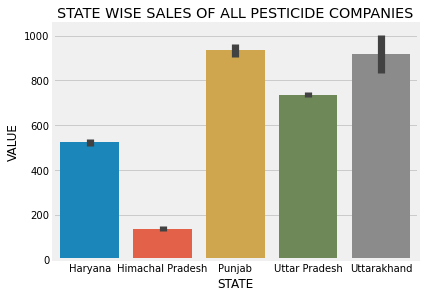

In [23]:
ax = sns.barplot(x="STATE", y="VALUE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('STATE WISE SALES OF ALL PESTICIDE COMPANIES')
plt.show()

**Punjab and Uttarakhand has the highest in consumption of the Pesticides.Where Himachal pradesh is lowest in consuming pesticide.**

Text(0.5, 1.0, 'RAINFALL')

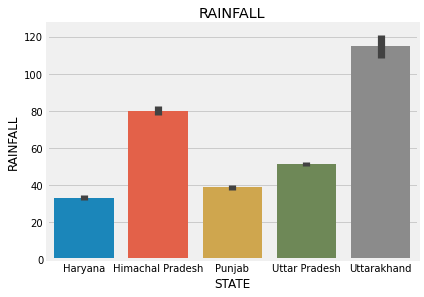

In [24]:
sns.barplot(x='STATE',y='RAINFALL',data=df2)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('RAINFALL')

Here the graph shows that Uttarakhand is highest in getting rainfall among all other four states.which in turn has the highest pesticide consumption.

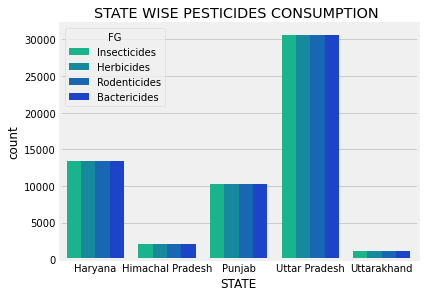

In [25]:
ax=sns.countplot(x='STATE',hue='FG',data=df,palette='winter_r')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('STATE WISE PESTICIDES CONSUMPTION ')
plt.show()


As shown in Graph,There is an equal comsumption of all four type of Pesticides in every state.
Out of five States Uttar Pradesh is highest selling state.


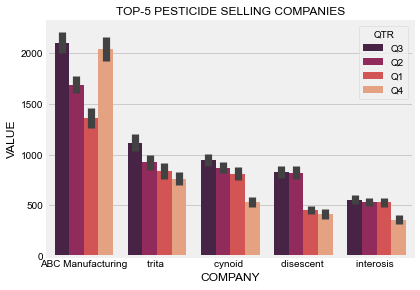

In [26]:
directors=df["COMPANY"]
ax=sns.barplot(x=directors,y='VALUE',hue='QTR',order=directors.value_counts().iloc[:5].index,palette='rocket',data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
sns.set(rc={'figure.figsize':(14,6)})
plt.tight_layout()
plt.title('TOP-5 PESTICIDE SELLING COMPANIES')
plt.show()

Here among the Top-5 pesticide selling companies 'ABC Manufacturing ' is highest selling company . QTR 3 has highest selling of pesticide As per the QTR wise distribution of sales. 

# ABC MANUFACTTURING

Text(0.5, 1.0, 'ABC Manufacture Pesticide Sales')

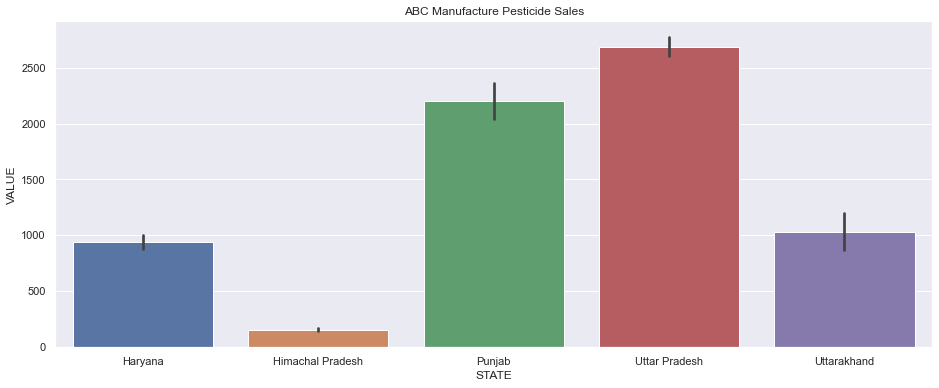

In [27]:
sns.barplot(x='STATE',y='VALUE',data=df2)
plt.title('ABC Manufacture Pesticide Sales')

Text(0.5, 1.0, 'ABC Manufacture Pesticide Sales')

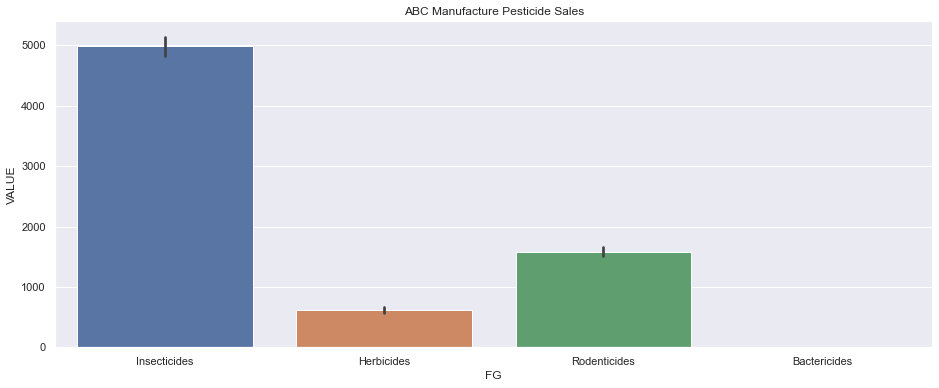

In [28]:
sns.barplot(x='FG',y='VALUE',data=df2)
plt.title('ABC Manufacture Pesticide Sales')

As per the graph, ABC Manufacturing has no value in Bactericides. It means ABC Manufacturing aren't supplying Bactericides whereas Insecticides shows the highest Sales.

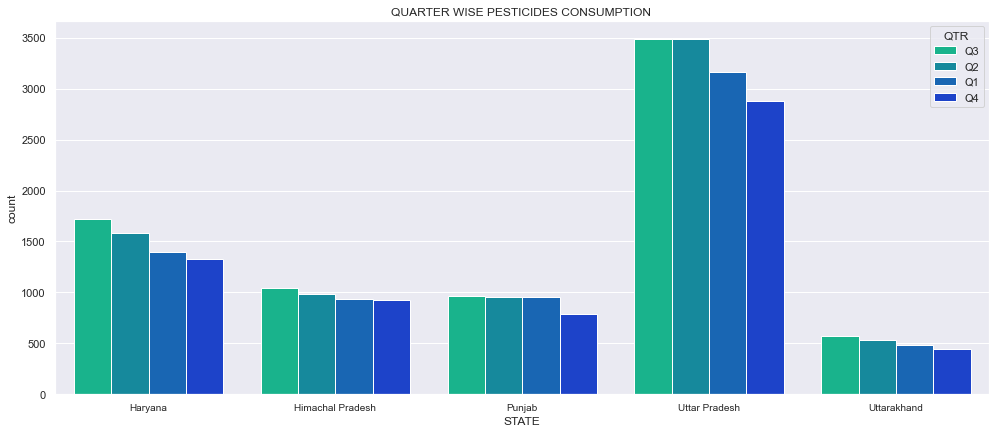

In [29]:
ax=sns.countplot(x='STATE',hue='QTR',data=df2,palette='winter_r')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('QUARTER WISE PESTICIDES CONSUMPTION ')
plt.show()

Here Uttar pradesh has highest pesticide consumption of ABC company.
Out of four quarter Q3 is highest sold Quarter.
Out of four products Insecticides is most sale product.


# VISUALISATION OF STATE WISE SALES OF PESTICIDE FOR ABC MANUFACTURING

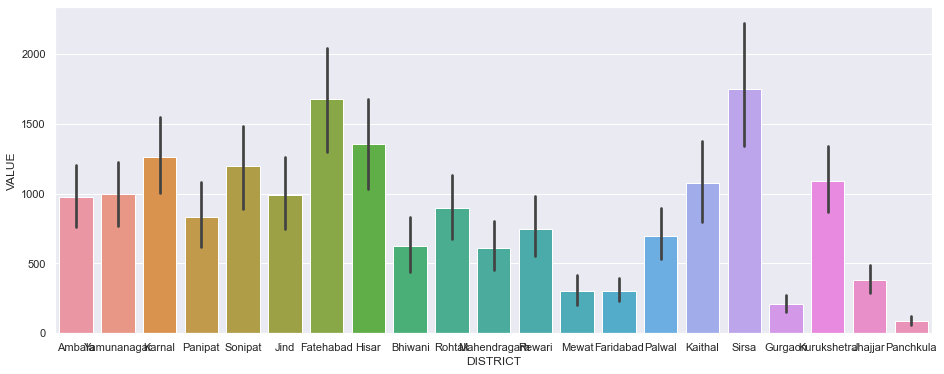

In [30]:
HR=df2[df2['STATE']==('Haryana')]
sns.barplot(x='DISTRICT',y='VALUE',data=HR)
sns.set(rc={'figure.figsize':(18,18)})
#plt.title('ABC Manufacturing Pesticide Sales of Haryana ')

Text(0.5, 1.0, 'ABC Manufacture Pesticide Sales of Himachal Pradesh')

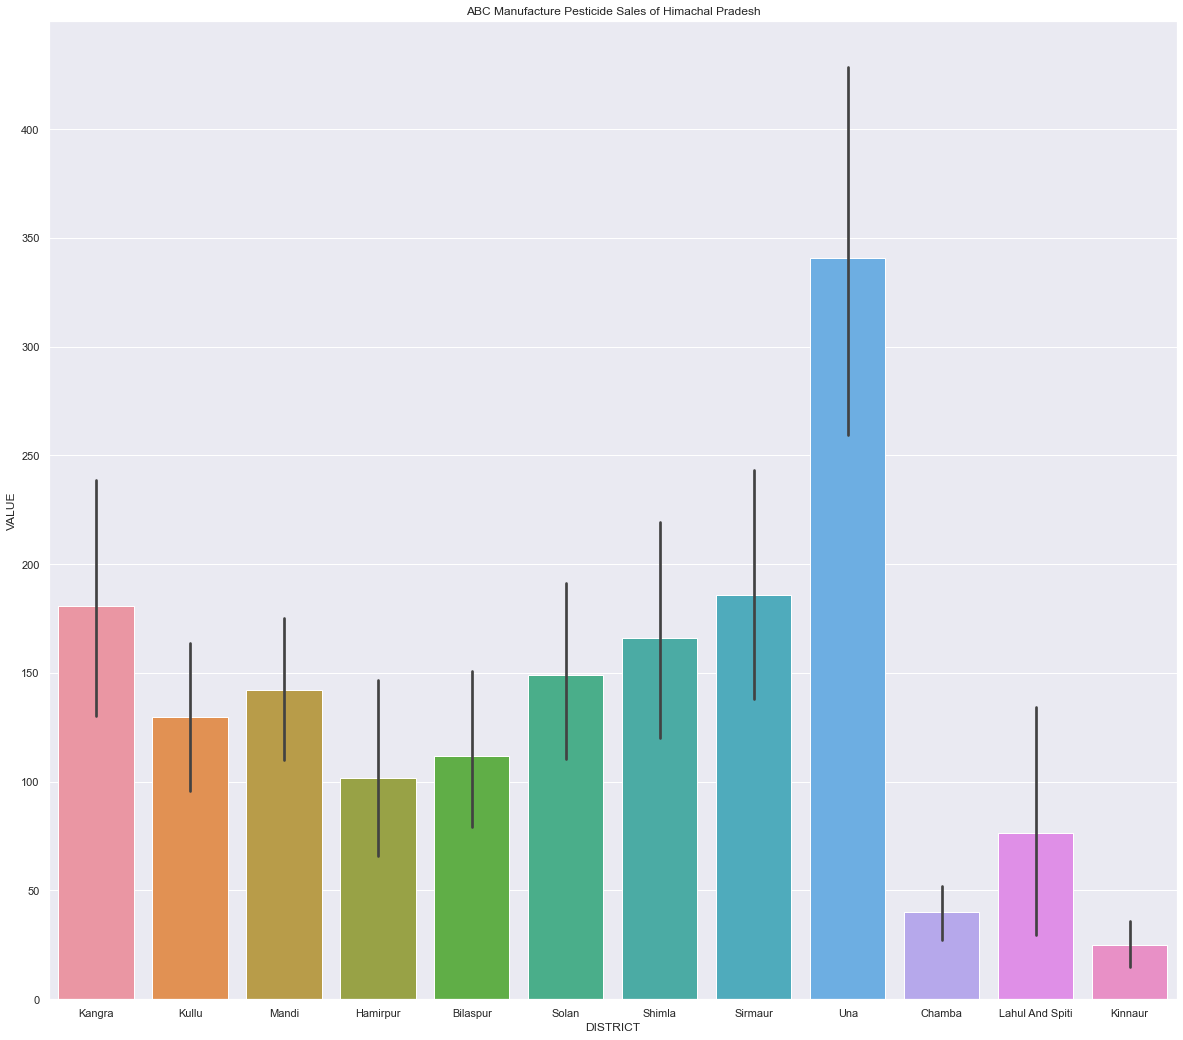

In [31]:
HP=df2[df2['STATE']==('Himachal Pradesh')]
sns.barplot(x='DISTRICT',y='VALUE',data=HP)
sns.set(rc={'figure.figsize':(18,7)})

plt.title('ABC Manufacture Pesticide Sales of Himachal Pradesh')

Text(0.5, 1.0, 'ABC Manufacture Pesticide Sales of Uttarakhand')

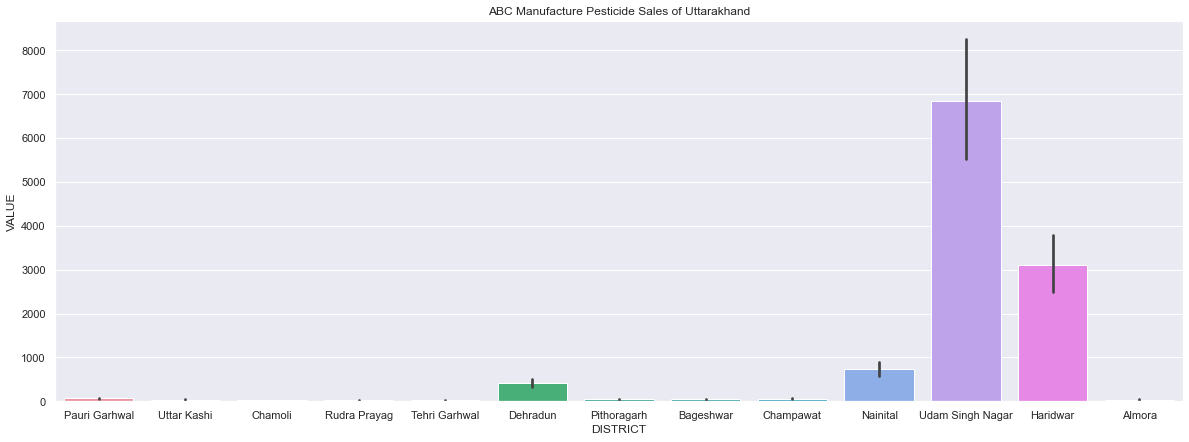

In [32]:
UK=df2[df2['STATE']==('Uttarakhand')]
sns.barplot(x='DISTRICT',y='VALUE',data=UK)
sns.set(rc={'figure.figsize':(18,7)})
plt.title('ABC Manufacture Pesticide Sales of Uttarakhand')


Text(0.5, 1.0, 'ABC Manufacture Pesticide Sales of Punjab')

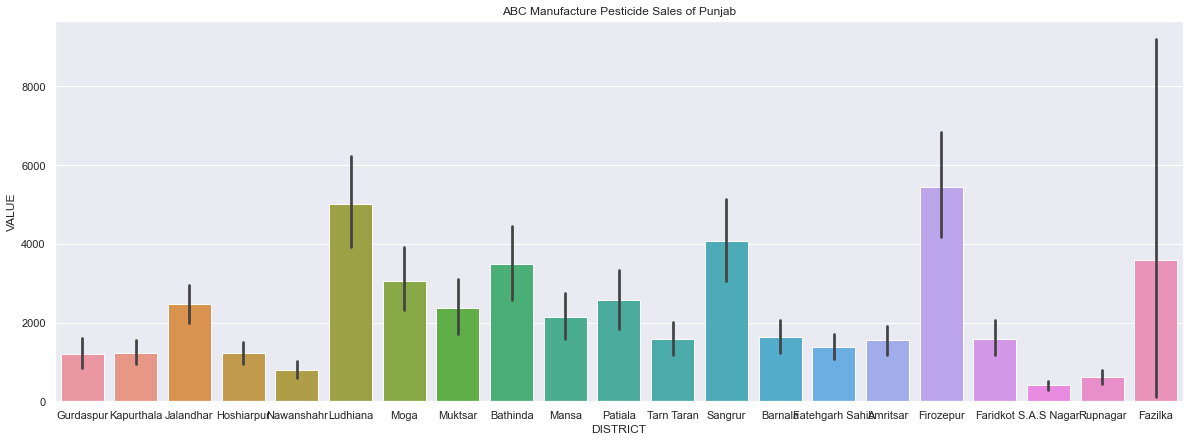

In [33]:
PN=df2[df2['STATE']==('Punjab')]
sns.barplot(x='DISTRICT',y='VALUE',data=PN)
sns.set(rc={'figure.figsize':(19,7)})

plt.title('ABC Manufacture Pesticide Sales of Punjab')


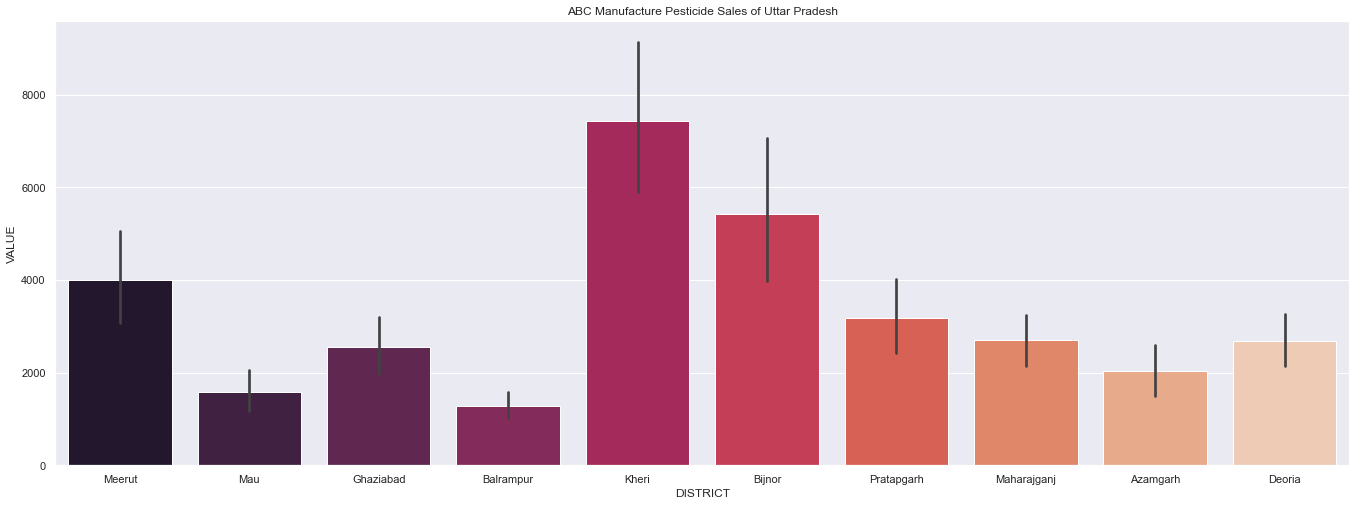

In [35]:
UP=df2[df2['STATE']==('Uttar Pradesh')]
UP['DISTRICT'].value_counts()
np.random.seed(123456)
directors=UP['DISTRICT']
ax=sns.barplot(x=directors,y='VALUE',order=directors.value_counts().iloc[:10].index,palette='rocket',data=UP)
plt.tight_layout()
plt.title('ABC Manufacture Pesticide Sales of Uttar Pradesh')
plt.show()

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

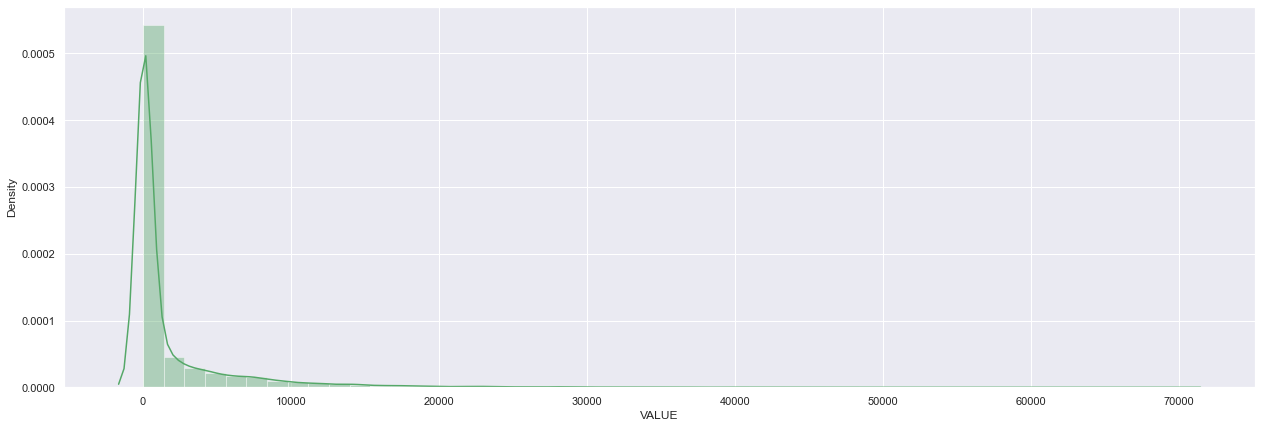

In [36]:
sns.distplot(df2['VALUE'],color='g')


Value is Right Skewed

<AxesSubplot:xlabel='VALUE'>

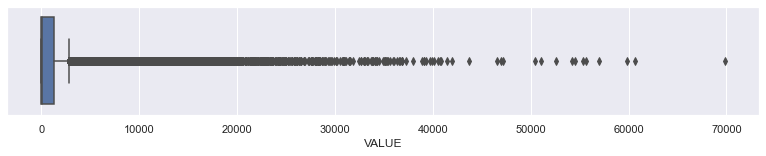

In [37]:
g = plt.subplots(figsize=(12, 2))
sns.boxplot(df2['VALUE'],whis=1.2)

In [38]:
df2.corr()

,VALUE,date,YEAR,RAINFALL
VALUE,1.000000,-0.071198,-0.071198,-0.035635
date,-0.071198,1.000000,1.000000,0.072321
YEAR,-0.071198,1.000000,1.000000,0.072321
RAINFALL,-0.035635,0.072321,0.072321,1.000000


<AxesSubplot:>

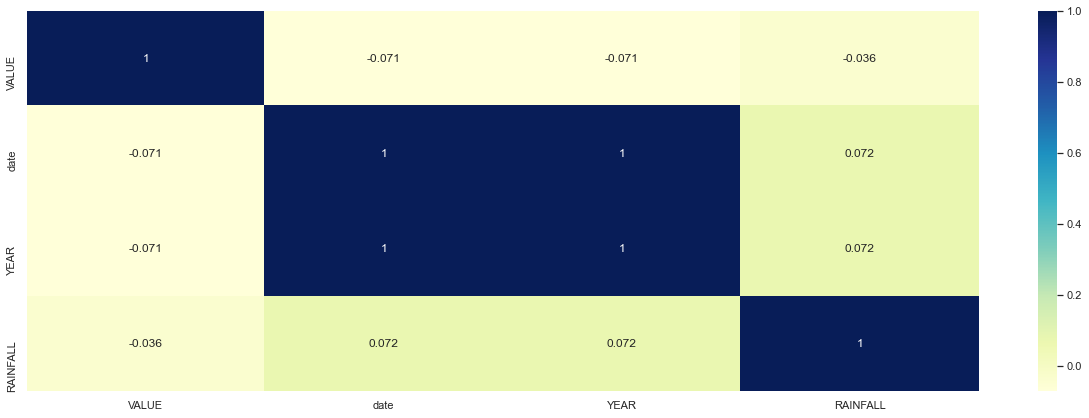

In [40]:
sns.heatmap(df2.corr(),annot= True,cmap="YlGnBu")

Rainfall has a low negative correlation with absolute value close to 0 with the Target variable. So, we can drop the rainfall data.

# CONCLUSION :
1)Here among the Top-5 pesticide selling companies 'ABC Manufacturing ' is highest selling company .

2)QTR 3 has highest selling of pesticide As per the QTR wise distribution of sales.

3)Uttar Pradesh has highest pesticide consumption of ABC Manufacturing company.

4)Out of four products Insecticides is most sale product.

# Checking for Stationarity
##Augmented Dickey Fuller (ADF) H0 :- time series can be represented by a unit root , that is not stationary H1 :- if we reject null hypothesis then time series is stationary

In [43]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2.VALUE)
print('p value: %f' % result[1])

p value: 0.000000


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

# State wise Trend Analysis of the given sales value

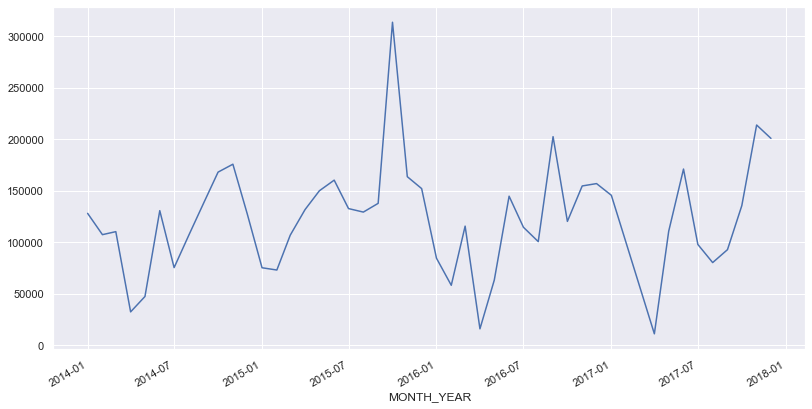

In [39]:
#HARYANA
HR= HR.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()
HR.set_index('MONTH_YEAR',inplace = True)

a= HR['VALUE']
#a=HR["VALUE"]

a.plot(figsize =(12,7))
plt.ylabel = "VALUE"
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

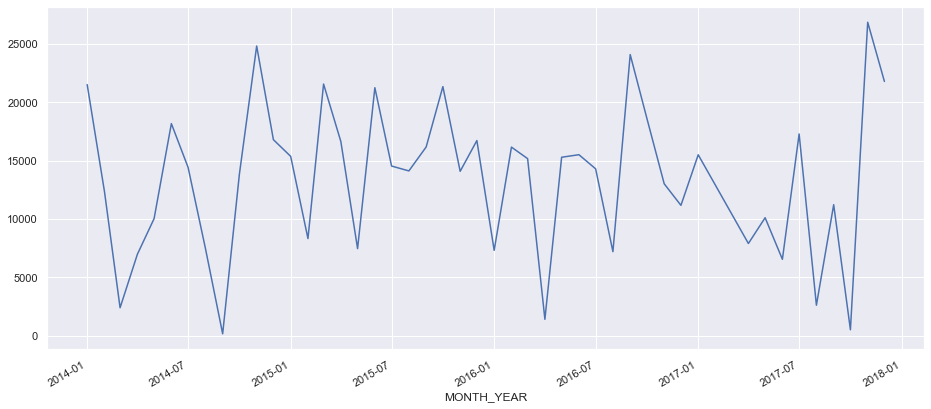

In [40]:
#HIMACHAL PRADESH
HP= HP.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()
HP.head()
HP.set_index('MONTH_YEAR',inplace = True)

b= HP['VALUE']
#b=HP["VALUE"]
b.plot(figsize=(14,7))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

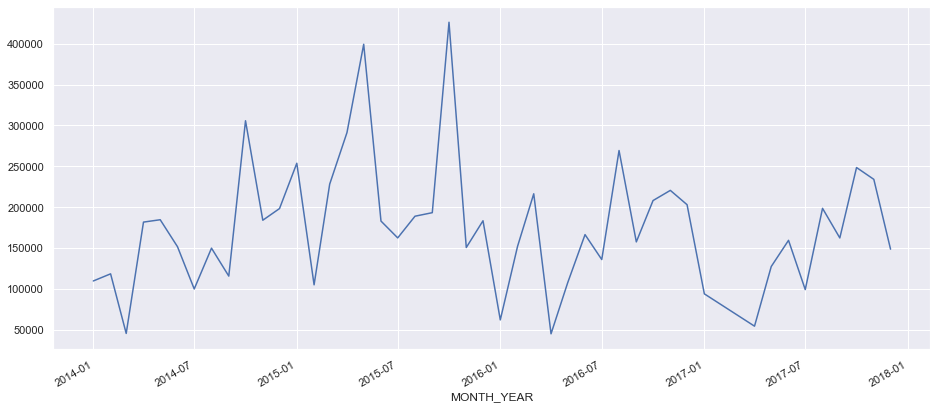

In [41]:
#PUNJAB
PN= PN.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()
PN.shape
PN.set_index('MONTH_YEAR',inplace = True)
f=PN["VALUE"]
f.plot(figsize=(14,7))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

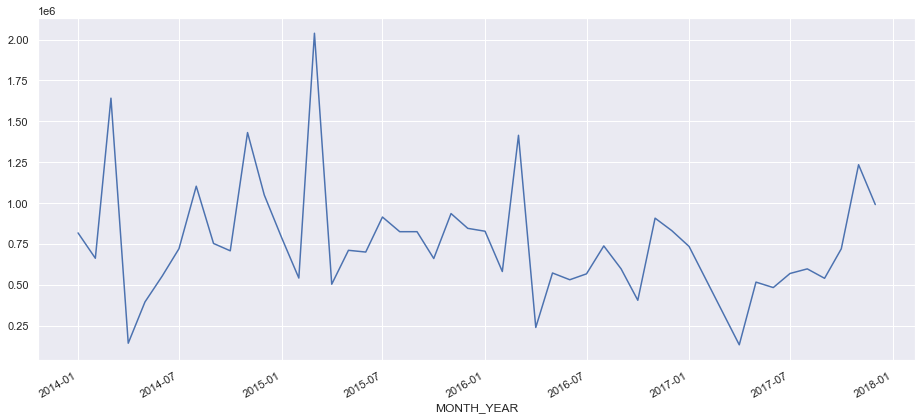

In [42]:
#UTTAR PRADESH
UP= UP.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()
UP.shape
UP.set_index('MONTH_YEAR',inplace = True)  
c=UP["VALUE"]
c.plot(figsize=(14,7))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

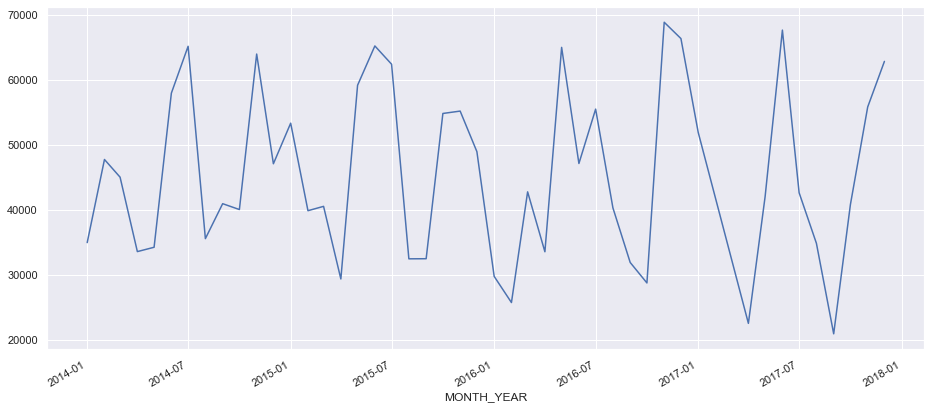

In [44]:
#UTTARAKHAND
UK= UK.groupby('MONTH_YEAR')['VALUE'].sum().reset_index()
UK.shape
UK.set_index('MONTH_YEAR',inplace = True)  
e=UK["VALUE"]
e.plot(figsize=(14,7))
plt.show

As per the pattern shown in the above plot ,The time-series has seasonality pattern.

Checking our data with a method called Decompostion. It will allows us to decompose the time series data into three distinct components trend,seasonality and noise

# Decompostion (state wise)


In [ ]:
##HARYANA


In [45]:
#Cheking null value 

In [46]:
 y= HR['VALUE'].resample('MS').mean()
y['2017':]

MONTH_YEAR
2017-01-01    145582.245
2017-02-01           NaN
2017-03-01           NaN
2017-04-01     11309.085
2017-05-01    110724.975
2017-06-01    171017.595
2017-07-01     97934.940
2017-08-01     80357.130
2017-09-01     92884.995
2017-10-01    135560.655
2017-11-01    213711.210
2017-12-01    200733.525
Freq: MS, Name: VALUE, dtype: float64

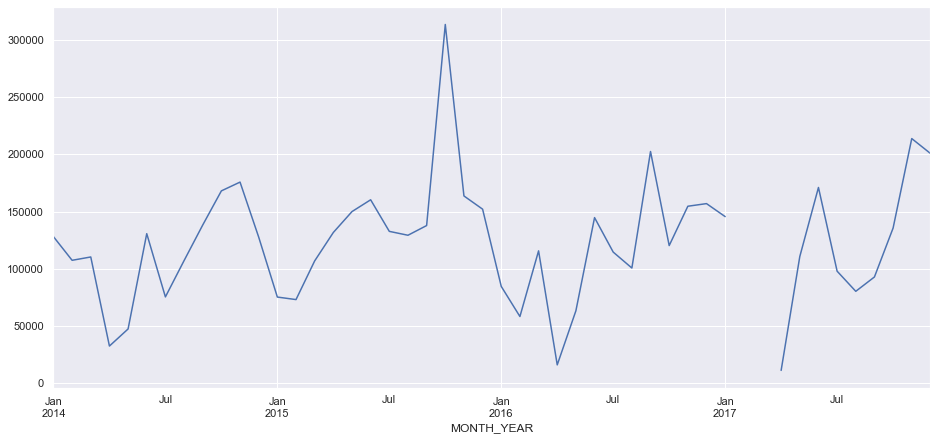

In [47]:
# Plot time series data
y.plot(figsize = (14,7))
plt.show()

In [48]:
# Missing value treatment
y.fillna(y.mean(),inplace = True)
y['2017':]

MONTH_YEAR
2017-01-01    145582.245000
2017-02-01    123200.639022
2017-03-01    123200.639022
2017-04-01     11309.085000
2017-05-01    110724.975000
2017-06-01    171017.595000
2017-07-01     97934.940000
2017-08-01     80357.130000
2017-09-01     92884.995000
2017-10-01    135560.655000
2017-11-01    213711.210000
2017-12-01    200733.525000
Freq: MS, Name: VALUE, dtype: float64

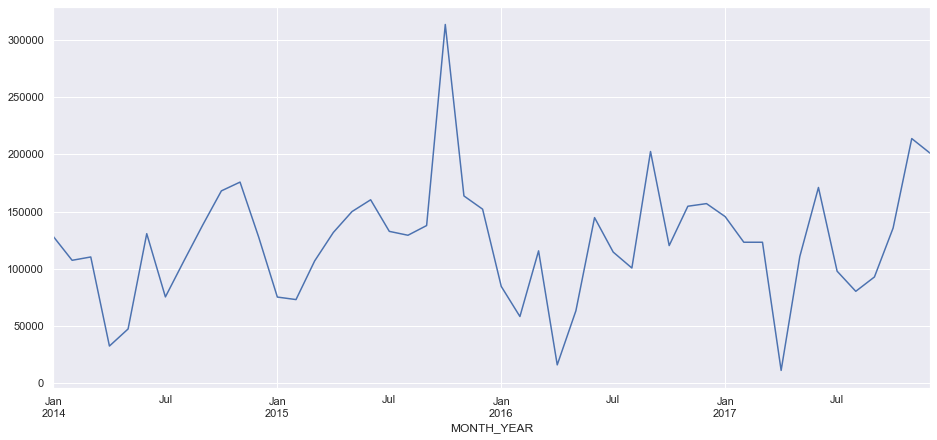

In [73]:
y.plot(figsize = (14,7))
plt.show()

# Time series decomposition

In [49]:
#HARYANA

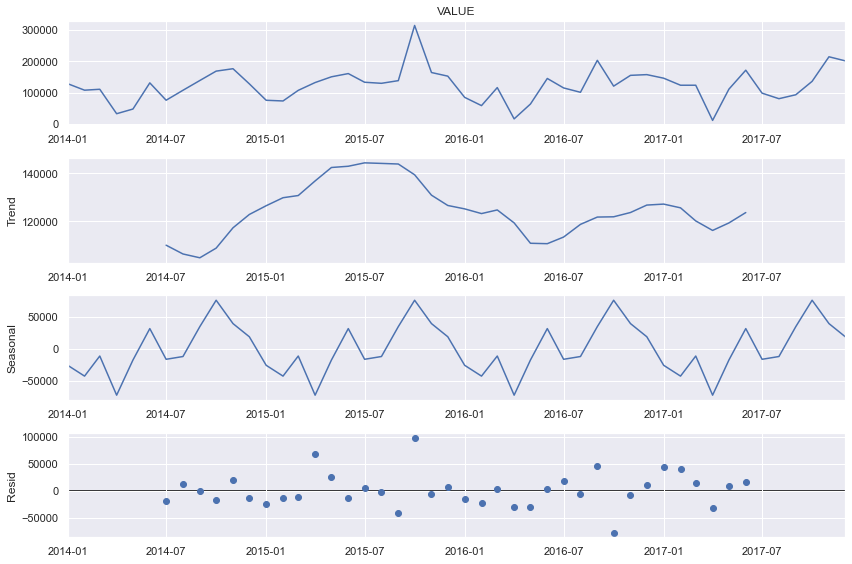

In [50]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'additive')
fig= decomposition.plot()
plt.show()

In [ ]:
##UTTAR PRADESH

In [76]:
y1 = UP['VALUE'].resample('MS').mean()

In [77]:
y1['2017':]

MONTH_YEAR
2017-01-01     734645.700
2017-02-01            NaN
2017-03-01            NaN
2017-04-01     132897.240
2017-05-01     516515.670
2017-06-01     483089.130
2017-07-01     569271.915
2017-08-01     597466.935
2017-09-01     539775.090
2017-10-01     720295.875
2017-11-01    1234663.965
2017-12-01     991006.515
Freq: MS, Name: VALUE, dtype: float64

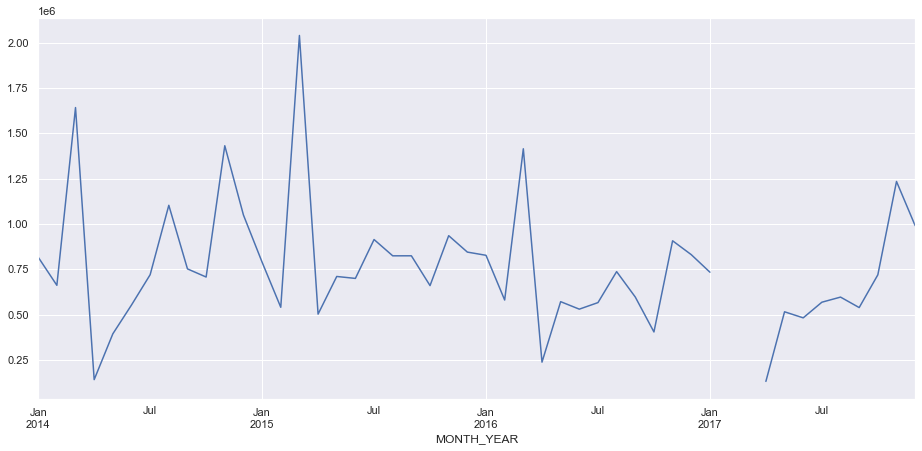

In [78]:

y1.plot(figsize = (14,7))
plt.show()

In [79]:
y1.fillna(y.mean(),inplace = True)

In [80]:
y1['2017':]

MONTH_YEAR
2017-01-01    7.346457e+05
2017-02-01    1.232006e+05
2017-03-01    1.232006e+05
2017-04-01    1.328972e+05
2017-05-01    5.165157e+05
2017-06-01    4.830891e+05
2017-07-01    5.692719e+05
2017-08-01    5.974669e+05
2017-09-01    5.397751e+05
2017-10-01    7.202959e+05
2017-11-01    1.234664e+06
2017-12-01    9.910065e+05
Freq: MS, Name: VALUE, dtype: float64

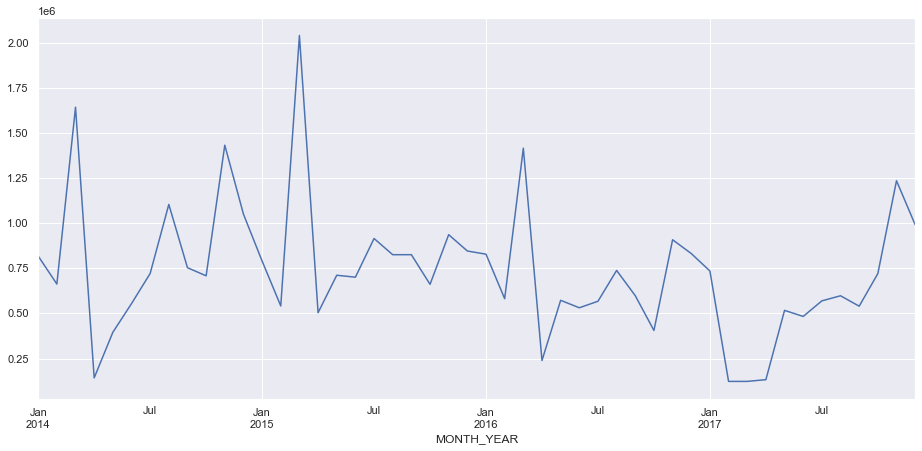

In [81]:
y1.plot(figsize = (14,7))
plt.show()

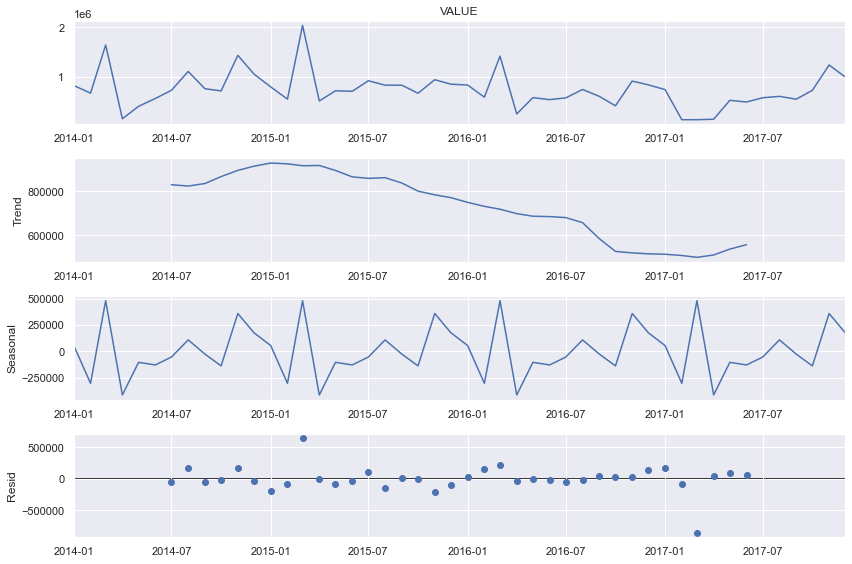

In [82]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y1,model= 'additive')
fig= decomposition.plot()
plt.show()

##PUNJAB

In [83]:
y2 = PN['VALUE'].resample('MS').mean()
y2.fillna(y2.mean(),inplace = True)


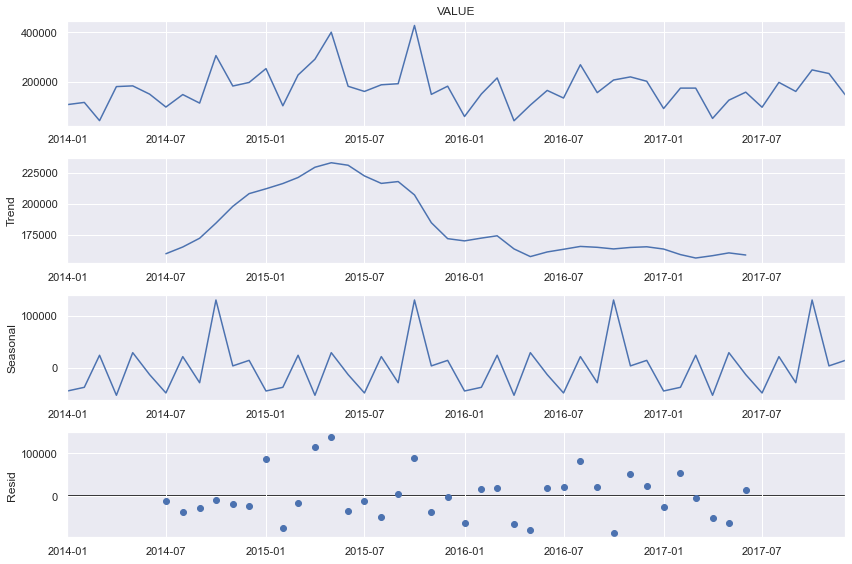

In [84]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y2,model= 'additive')
fig= decomposition.plot()
plt.show()

UTTARAKHAND

In [85]:
y3 = UK['VALUE'].resample('MS').mean()
y3.fillna(y3.mean(),inplace = True)


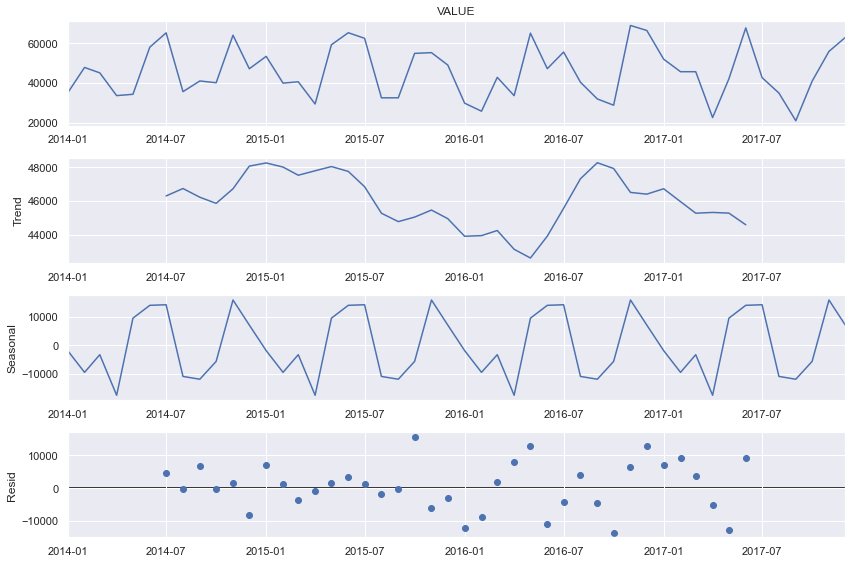

In [86]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y3,model= 'additive')
fig= decomposition.plot()
plt.show()

HIMACHAL PRADESH

In [87]:
y4 = HP['VALUE'].resample('MS').mean()
y4.fillna(y4.mean(),inplace = True)


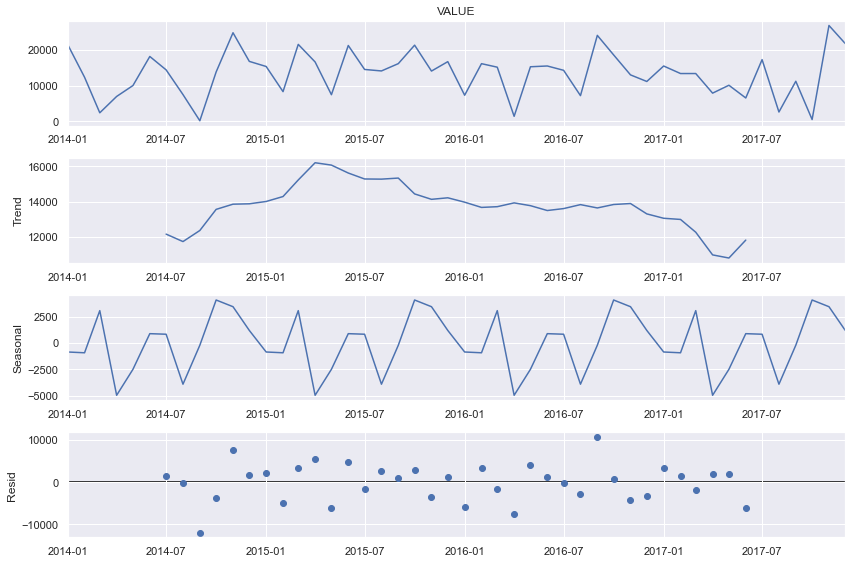

In [88]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y4,model= 'additive')
fig= decomposition.plot()
plt.show()

The plots above clearly shows that the sales are uncertain, along with its seasonality.

# Split the Train and Test Data based on States

In [89]:
train_len = 38
train = y[0:train_len]
test = y[train_len:]

In [90]:
train_len1 = 38
train1 = y1[0:train_len1]
test1 = y1[train_len1:]

In [91]:
train_len2 = 38
train2 = y2[0:train_len1]
test2 = y2[train_len1:]

In [92]:
train_len = 38
train3 = y3[0:train_len1]
test3 = y3[train_len1:]

In [93]:
train_len4 = 38
train4 = y4[0:train_len1]
test4 = y4[train_len1:]

In [94]:
train

MONTH_YEAR
2014-01-01    128078.820000
2014-02-01    107427.060000
2014-03-01    110342.925000
2014-04-01     32577.660000
2014-05-01     47482.740000
2014-06-01    130684.185000
2014-07-01     75471.075000
2014-08-01    107146.530000
2014-09-01    138232.710000
2014-10-01    168045.030000
2014-11-01    175710.870000
2014-12-01    127656.945000
2015-01-01     75341.880000
2015-02-01     73139.760000
2015-03-01    106902.720000
2015-04-01    131720.580000
2015-05-01    149968.395000
2015-06-01    160265.790000
2015-07-01    132693.660000
2015-08-01    129301.785000
2015-09-01    137774.115000
2015-10-01    313321.500000
2015-11-01    163620.135000
2015-12-01    152072.100000
2016-01-01     84634.065000
2016-02-01     58354.155000
2016-03-01    115689.195000
2016-04-01     16131.285000
2016-05-01     63360.630000
2016-06-01    144712.575000
2016-07-01    114598.395000
2016-08-01    100687.320000
2016-09-01    202416.975000
2016-10-01    120286.890000
2016-11-01    154636.020000
2016-12-0

In [95]:
test

MONTH_YEAR
2017-03-01    123200.639022
2017-04-01     11309.085000
2017-05-01    110724.975000
2017-06-01    171017.595000
2017-07-01     97934.940000
2017-08-01     80357.130000
2017-09-01     92884.995000
2017-10-01    135560.655000
2017-11-01    213711.210000
2017-12-01    200733.525000
Freq: MS, Name: VALUE, dtype: float64

# Moving average forecast

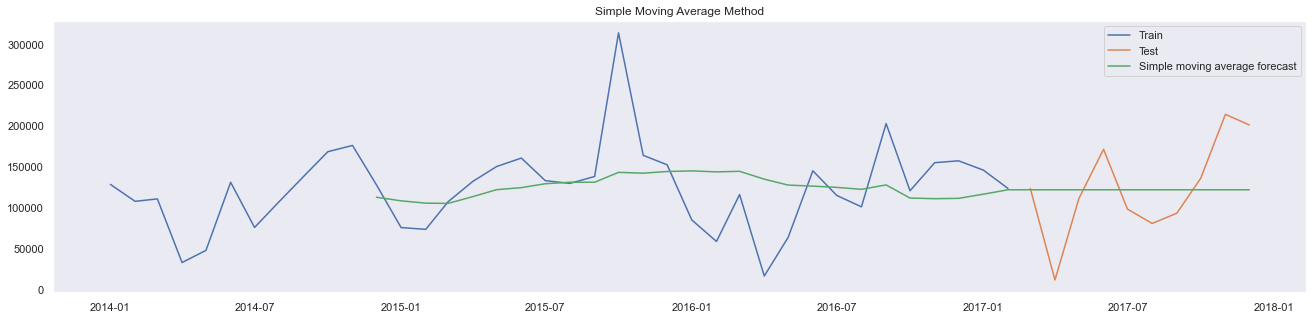

In [96]:
y_hat_sma = y.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = y.rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

####

In [97]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test-y_hat_sma['sma_forecast'][train_len:])/test)*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,57234.25,121.37


As this is a big error so we are moving on ARMA 

# Model Building with ARIMA

Auto-Regressive Intergrated Moving Average




In [98]:
from statsmodels.tsa.arima_model import ARIMA

In [99]:
model = ARIMA(y, order=(0,1,1))

In [100]:
m1 = model.fit()

In [101]:
print(m1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.VALUE   No. Observations:                   47
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -579.886
Method:                       css-mle   S.D. of innovations          54989.297
Date:                Thu, 21 Apr 2022   AIC                           1165.773
Time:                        03:00:41   BIC                           1171.323
Sample:                    02-01-2014   HQIC                          1167.862
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1440.9227   3556.807      0.405      0.685   -5530.290    8412.136
ma.L1.D.VALUE    -0.5699      0.255     -2.237      0.025      -1.069      -0.071
                                    Root

In [102]:
y_hat= y.copy()
y_hat['arima forecast'] = m1.predict(36)
print(y_hat)

MONTH_YEAR
2014-01-01 00:00:00                                            128078.82
2014-02-01 00:00:00                                            107427.06
2014-03-01 00:00:00                                           110342.925
2014-04-01 00:00:00                                             32577.66
2014-05-01 00:00:00                                             47482.74
2014-06-01 00:00:00                                           130684.185
2014-07-01 00:00:00                                            75471.075
2014-08-01 00:00:00                                            107146.53
2014-09-01 00:00:00                                            138232.71
2014-10-01 00:00:00                                            168045.03
2014-11-01 00:00:00                                            175710.87
2014-12-01 00:00:00                                           127656.945
2015-01-01 00:00:00                                             75341.88
2015-02-01 00:00:00                     

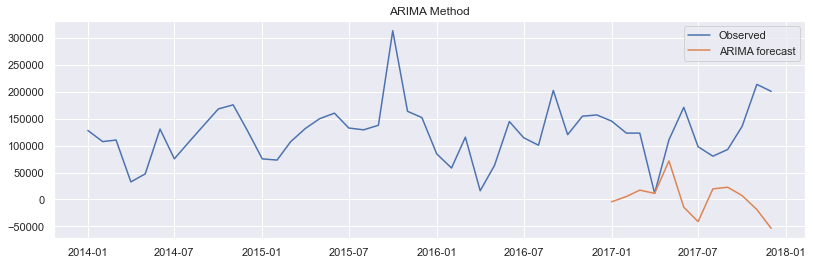

In [103]:
plt.figure(figsize=(12,4))
plt.plot(y, label='Observed')
plt.plot(y_hat['arima forecast'], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

As per above plot there is seasonality involved.so we will move to SARIMA (Seasonal Auto-Regressive Intergrated Moving Average). SARIMA is an updated version of ARIMA model. Based on the concept of seasonal trends.

# forecasting with SARIMA

In [104]:
import itertools


In [105]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


##parameter selection using grid search

In [106]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1245.098054866258
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:164518.92103902888
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:877.2222052929242
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:567.4127945490006
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:901.2864818158962
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:158478.98136256842
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:590.5363520316673
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:568.5450203131469
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1195.0366492079863
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:137345.96673089452
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:852.5582905889171
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:545.6768946296307
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:928.8779663527177
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:130362.60126232468
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:594.9913993009853
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:546.719426270905
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1145.394934116938
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:27046.060072047185
ARIMA

In [108]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1415.680543504047
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10200496.958816206
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:992.1674901840686
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:654.8468630990081
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1011.7291518415407
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9576708.43934105
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:684.146519470944
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:656.8347999618626
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1369.567191831166
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6954010.992135315
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:957.8939093427155
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:625.429537324135
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1054.4303675675735
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:9137946.214401148
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:681.2933533570019
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:627.4270483328626
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1344.3945836654157
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4334101.8829536885
ARIMA(0,

In [109]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1279.4901695971
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:385746.0200963074
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:911.6246053697728
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:588.1210848956205
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:936.5120205085847
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:320838.83148707193
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:617.9268401425766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:590.0892546622084
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1233.5704826346653
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:357503.89832918893
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:884.1585583181835
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:561.0380014248365
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:956.8104983935606
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:298097.99326837435
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:620.3113025834274
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:562.9604505747121
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1194.3259834192156
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:88617.31191039359
ARIMA(0

In [110]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1147.9555901566496
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:30664.91816756844
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:766.052370791129
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:502.71882352020816
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:789.9207929531103
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1187.7393826166408
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:521.2804218953761
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:502.2403104804186
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1098.0276434112475
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26831.52837435481
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:746.7912866928651
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:483.3310898654578
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:848.8128821493348
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:24322.440983474557
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:524.5059585008503
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:482.12495760783054
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1026.5146068618278
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1389.0242576796873
ARI

In [111]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y4,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1036.9779787696677
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1567.7717726034366
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:736.481540161292
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:479.67354039002333
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:755.7154638770661
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1399.7967842115643
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:503.8214001328845
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:481.5212496233047
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:999.0578345891058
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4960.80703461878
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:718.448819326492
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:460.15879597471616
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:757.433918789714
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4337.216609736188
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:505.2453746900395
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:461.77505267633364
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:968.6341042997311
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1347.6305966073664
ARIMA(0

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value.Therefore we should consider this to be optimal option.

# Fitting SARIMA model

In [ ]:
## Hryana

In [112]:
mod = sm.tsa.statespace.SARIMAX(y, order = (0,1,1), seasonal_order = (0,1,1,12))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5921      0.225     -2.626      0.009      -1.034      -0.150
ma.S.L12      -0.6332      0.342     -1.850      0.064      -1.304       0.038
sigma2      4.858e+09    2.3e-11   2.11e+20      0.000    4.86e+09    4.86e+09


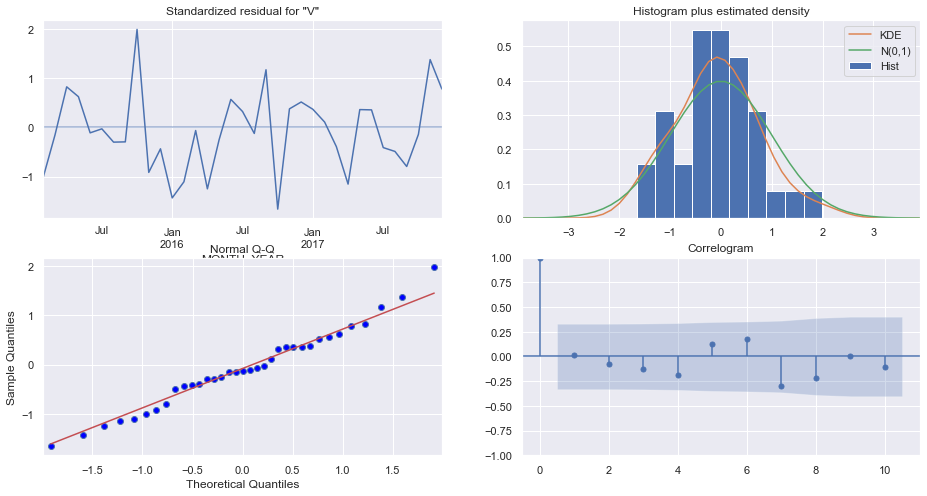

In [113]:
results.plot_diagnostics(figsize=(14, 8))
plt.show()

The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution.

In [114]:
mod = sm.tsa.statespace.SARIMAX(y1, order = (0,1,1), seasonal_order = (0,1,1,12))
results1 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5921      0.225     -2.626      0.009      -1.034      -0.150
ma.S.L12      -0.6332      0.342     -1.850      0.064      -1.304       0.038
sigma2      4.858e+09    2.3e-11   2.11e+20      0.000    4.86e+09    4.86e+09


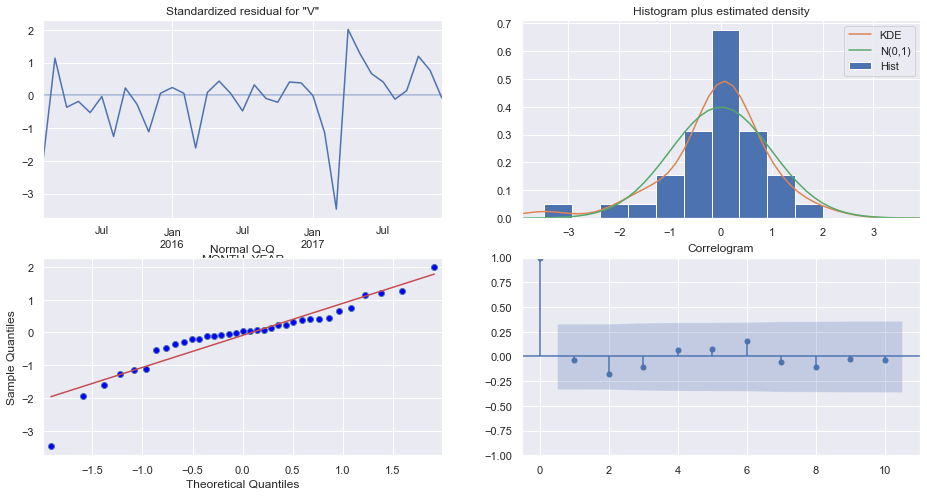

In [115]:
results1.plot_diagnostics(figsize=(14, 8))
plt.show()

In [116]:
mod = sm.tsa.statespace.SARIMAX(y2, order = (0,1,1), seasonal_order = (0,1,1,12))
results2 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5921      0.225     -2.626      0.009      -1.034      -0.150
ma.S.L12      -0.6332      0.342     -1.850      0.064      -1.304       0.038
sigma2      4.858e+09    2.3e-11   2.11e+20      0.000    4.86e+09    4.86e+09


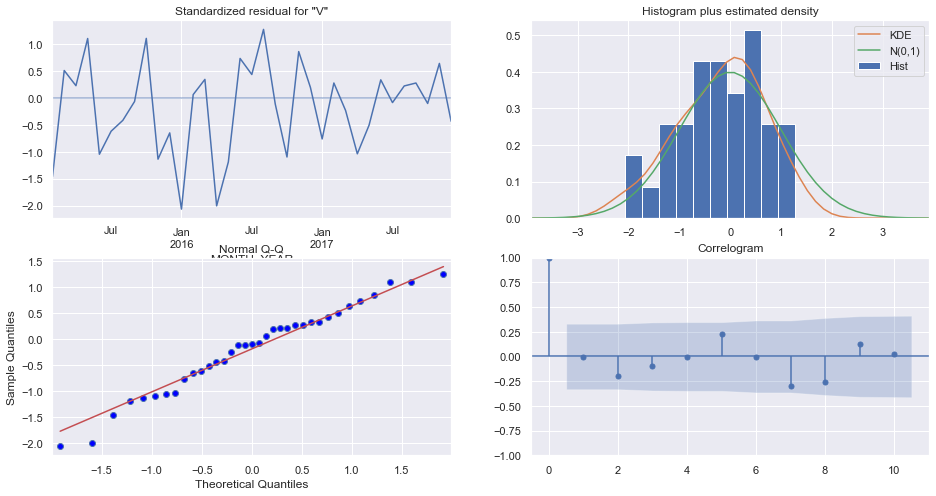

In [117]:
results2.plot_diagnostics(figsize=(14, 8))
plt.show()

In [44]:
mod = sm.tsa.statespace.SARIMAX(y3, order = (0,1,1), seasonal_order = (0,1,1,12))
results3 = mod.fit()
print(results.summary().tables[1])

NameError: name 'y3' is not defined

In [ ]:
results3.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y4, order = (0,1,1), seasonal_order = (0,1,1,12))
results4 = mod.fit()
print(results.summary().tables[1])

In [ ]:
results4.plot_diagnostics(figsize=(14, 8))
plt.show()

# checking the Accuracy of our forecasts

In [ ]:
pred = results.get_prediction(start = pd.to_datetime("2017-01-01"),dynamic = False)
pred_ci = pred.conf_int()
ax= y["2014":].plot(label = "Observed")
pred.predicted_mean.plot(ax = ax,label = "One step ahead forecast", figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], alpha = .2)

ax.set_xlabel("Year")
ax.set_ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 3)))

In [ ]:
mape_s = np.round(np.mean(np.abs(y_truth-y_forecasted)/y_truth)*100,2)

In [ ]:
print(mape_s)

In [ ]:
pred1 = results1.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y1['2014':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [ ]:
y1_forecasted = pred.predicted_mean
y1_truth = y1['2017-01-01':]
mse = ((y1_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 3)))

In [ ]:
mape_s = np.round(np.mean(np.abs(y_truth-y_forecasted)/y_truth)*100,2)

In [ ]:
print(mape_s)

In [ ]:
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci2 = pred.conf_int()
ax = y2['2014':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y2['2017-01-01':]
mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 3)))

In [ ]:
mape_s = np.round(np.mean(np.abs(y_truth-y_forecasted)/y_truth)*100,2)

In [ ]:
print(mape_s)

In [ ]:
pred3 = results3.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci3 = pred.conf_int()
ax = y3['2014':].plot(label='observed')
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted3 = pred3.predicted_mean
y_truth3 = y3['2017-01-01':]
mse3 = ((y_forecasted3 - y_truth3)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse3, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse3), 3)))

In [ ]:
mape_s3 = np.round(np.mean(np.abs(y_truth3-y_forecasted3)/y_truth3)*100,2)

In [ ]:
print(mape_s3)

In [ ]:
pred4 = results4.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci4 = pred4.conf_int()
ax = y4['2014':].plot(label='observed')
pred4.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci4.index,
                pred_ci4.iloc[:, 0],
                pred_ci4.iloc[:, 1], color='k', alpha=.20)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted4 = pred4.predicted_mean
y_truth4 = y4['2017-01-01':]
mse4 = ((y_forecasted4 - y_truth4)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse4, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse4), 3)))

In [ ]:
mape_s4 = np.round(np.mean(np.abs(y_truth4-y_forecasted4)/y_truth4)*100,2)
print(mape_s4)

As per the observation, we got minimal error and found seasonality in data .we can go ahead with SARIMA model.

# Forecast for 2018

The model will now be fed with the input and output data, this is the final step and now our model will be able to predict sales data.

In [ ]:
#HR
pred_uc = results.get_forecast(steps= 12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label= "observed",figsize = (14,7))
pred_uc.predicted_mean.plot(ax= ax,label = "Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],alpha = .25)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture sales")
print(pred_uc.predicted_mean,pred_ci)
#print(pred_ci)
plt.legend()
plt.show()

In [ ]:
a.tail(12).sum()

In [ ]:
pred_uc.predicted_mean.head(12).sum()

In [ ]:
sales_profit =((pred_uc.predicted_mean.head(12).sum() - a.tail(12).sum() )/pred_uc.predicted_mean.head(12).sum())*100
print(sales_profit)

## As per forecasted data  there will be a 19% sales growth in HARYANA in year 2018

In [ ]:
#UP
pred_uc1 = results1.get_forecast(steps=12)
pred_ci1 = pred_uc1.conf_int()
ax = y1.plot(label='observed',figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
print(pred_uc1.predicted_mean,pred_ci1)
plt.legend()
plt.show()

In [ ]:
y1.tail(12).sum()

In [ ]:
pred_uc1.predicted_mean.head(12).sum()

In [ ]:
sales_profit = ((pred_uc1.predicted_mean.head(12).sum()- y1.tail(12).sum())/pred_uc1.predicted_mean.head(12).sum())*100
sales_profit


## As per forecasted data  there will be a 26% sales growth in UTTAR PRADESH in year 2018


In [ ]:
#PN
pred_uc2 = results2.get_forecast(steps=12)
pred_ci2 = pred_uc2.conf_int()
ax = y2.plot(label='observed',figsize=(14, 7))
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
print(pred_uc2.predicted_mean,pred_ci2)
plt.legend()
plt.show()

In [ ]:
y2.tail(12).sum()

In [ ]:
pred_uc2.predicted_mean.head(12).sum()

In [ ]:
sales_profit = ((pred_uc2.predicted_mean.head(12).sum()-y2.tail(12).sum())/pred_uc2.predicted_mean.head(12).sum())*100
sales_profit

## As per forecasted data  there will be a 12% sales growth in PUNJAB in year 2018

In [ ]:
#UK
pred_uc3 = results3.get_forecast(steps=12)
pred_ci3 = pred_uc3.conf_int()
ax = y3.plot(label='observed',figsize=(14, 7))
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
print(pred_uc3.predicted_mean,pred_ci3)
plt.legend()
plt.show()

In [ ]:
y3.tail(12).sum()

In [ ]:
pred_uc3.predicted_mean.head(12).sum()

In [ ]:
sales_profit = ((pred_uc3.predicted_mean.head(12).sum()-y3.tail(12).sum())/pred_uc3.predicted_mean.head(12).sum())*100
sales_profit

## As per forecasted data  there will be a 14% sales growth in UTTARAKHAND in year 2018 

In [ ]:
#HP
pred_uc4 = results4.get_forecast(steps=12)
pred_ci4 = pred_uc4.conf_int()
ax = y4.plot(label='observed',figsize=(14, 7))
pred_uc4.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci4.index,
                pred_ci4.iloc[:, 0],
                pred_ci4.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
print(pred_uc4.predicted_mean,pred_ci4)
plt.legend()
plt.show()

In [ ]:
y4.tail(12).sum()

In [ ]:
pred_uc4.predicted_mean.head(12).sum()

In [ ]:
sales_profit = ((pred_uc4.predicted_mean.head(12).sum()-y4.tail(12).sum())/pred_uc4.predicted_mean.head(12).sum())*100
sales_profit

## As per forecasted data  there will be a 19% sales growth in HIMACHAL PRADESH in year 2018

In [ ]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Pesticide Sales')
plt.legend()
plt.show()

# CONCLUSION : There is an upward trend in sales in the coming years. so sales growth of ABC manufacturing company will increase . 